In [ ]:
%tensorflow_version 2.x

In [ ]:
%matplotlib inline
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, IntSlider, BoundedIntText

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Reshape size of each image from (28, 28) to (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Normalize data range
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [ ]:
# One hot encoding image labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=6, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) # no padding

In [ ]:
model.add(MaxPool2D()) # pool_size=(2, 2)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Conv2D(16, (3, 3), activation='relu'))  # no padding
model.add(MaxPool2D()) # pool_size=(2, 2)

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
Total params: 940
Trainable params: 940
Non-trainable params: 0
_________________________________________________________________


### [全連接層]

In [ ]:
model.add(Dense(units=120, activation='relu'))

In [ ]:
model.add(Dense(units=84, activation='relu'))

#### 輸出層
- 神經元個數: 10
- 激活函數: softmax


In [ ]:
model.add(Dense(units=10, activation='softmax'))

### 編譯模型: 設定模型訓練時的設定

- Optimizer: Stochastic Gradient Descent (SGD)
- Loss: categorical cross-entropy 

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### 訓練模型: 透過訓練模型來學習分類資料的函數

In [ ]:
training_history = model.fit(X_train, y_train, 
                             batch_size=32, 
                             epochs=5,  
                             validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 38s 3ms/step - loss: 0.7952 - categorical_accuracy: 0.7507 - val_loss: 0.2182 - val_categorical_accuracy: 0.9279
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1690 - categorical_accuracy: 0.9480 - val_loss: 0.1406 - val_categorical_accuracy: 0.9587
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1156 - categorical_accuracy: 0.9644 - val_loss: 0.0929 - val_categorical_accuracy: 0.9714
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0937 - categorical_accuracy: 0.9709 - val_loss: 0.0865 - val_categorical_accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0794 - categorical_accuracy: 0.9747 - val_loss: 0.0649 - val_categorical_accuracy: 0.9792


### 訓練過程的評估

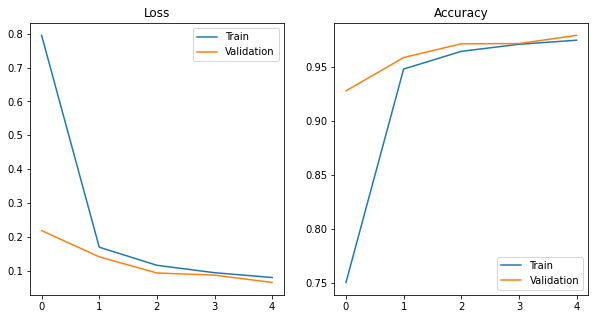

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(training_history.history['categorical_accuracy'])
plt.plot(training_history.history['val_categorical_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title("Accuracy");

In [ ]:
# prediction result on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("測試資料 loss: %f" %test_loss)
print("測試資料準確率: %f" %test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0649 - categorical_accuracy: 0.9792
測試資料 loss: 0.064878
測試資料準確率: 0.979200


## 5: 視覺化預測結果

在這部分，我們提供簡單的視覺化方法來呈現神經網路的輸入與輸出結果

In [ ]:
def visulization(idx=0):
    # Random pick one data from training set
    # idx = np.random.randint(X_train.shape[0])
    sample_x = X_test[idx]
    sample_y = y_test[idx]
    # Predict the class of random data
    predict_y = model.predict(X_test[idx:idx+1]).squeeze()
    predict_label = predict_y.argmax()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # Plot raw image
    ax1.imshow(sample_x[:, :, 0], 'gray_r')
    ax1.set_title("Image Label: %d" %sample_y.argmax())

    # Plot prediction probability of each classes
    ax2.barh(np.arange(10), predict_y)
    ax2.patches[predict_label].set_facecolor('Red')
    ax2.set_title("Prediction Result: %d" %predict_label);
    if sample_y.argmax()==predict_y.argmax():
        print("預測正確!")
    else:
        print("預測失敗QQ")

In [ ]:
interact(visulization, idx=BoundedIntText(value=0, min=0, max=X_test.shape[0]-1));

interactive(children=(BoundedIntText(value=0, description='idx', max=9999), Output()), _dom_classes=('widget-i…

In [ ]:
predictions=model.predict(X_test)
predictions=np.argmax(predictions,axis=1)

df=pd.DataFrame()
df['Id']=[str(i) for i in range(len(X_test))]
df['Category']=predictions
df.to_csv('result.csv',index=None)
df

,Id,Category
0,0,7
1,1,2
2,2,1
3,3,0
4,4,4
...,...,...
9995,9995,2
9996,9996,3
9997,9997,4
9998,9998,5
